In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0




29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
# Reshape the images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Visualize the CNN layers
model.summary()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7430 - loss: 0.6998 - val_accuracy: 0.8706 - val_loss: 0.3628
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8801 - loss: 0.3293 - val_accuracy: 0.8820 - val_loss: 0.3216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8988 - loss: 0.2743 - val_accuracy: 0.8886 - val_loss: 0.3030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9080 - loss: 0.2488 - val_accuracy: 0.9039 - val_loss: 0.2659
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9161 - loss: 0.2254 - val_accuracy: 0.9039 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9261 - loss: 0.2011 - val_accuracy: 0.9009 - val_loss: 0.2777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9323 - loss: 0.1824 - val_accuracy: 0.9109 - val_loss: 0.2704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9381 - loss: 0.1681

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step


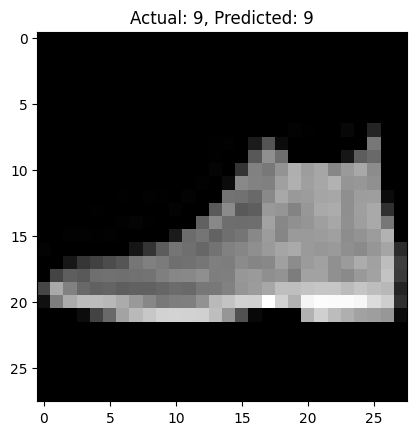

In [4]:
# Select an image from the test set
image_index = 0
test_image = test_images[image_index]
test_label = test_labels[image_index]

# Predict the class of the image
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

# Display the image and prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Actual: {test_label}, Predicted: {predicted_label}')
plt.show()


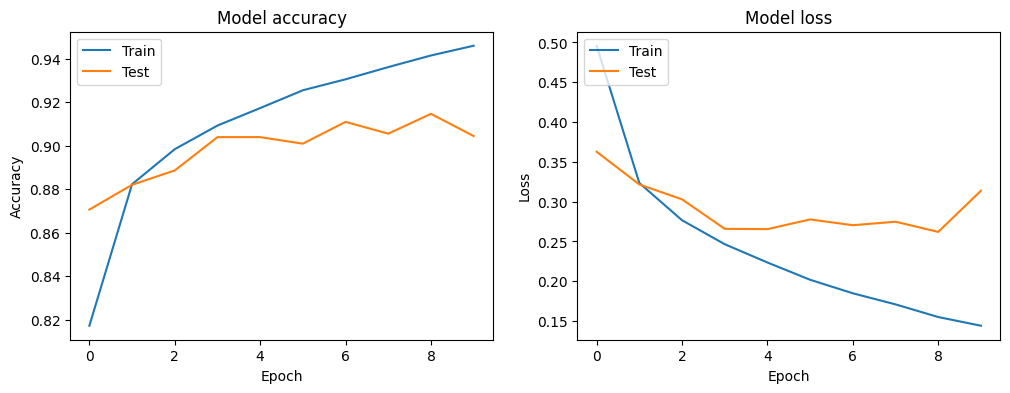

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [10]:
from tensorflow.keras.models import Model

# Call predict on the model
_ = model.predict(train_images[:1])

# Try accessing the input layer directly
input_layer = model.layers[0].input
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=input_layer, outputs=layer_outputs) # Now Model is defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Visualizing layer 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


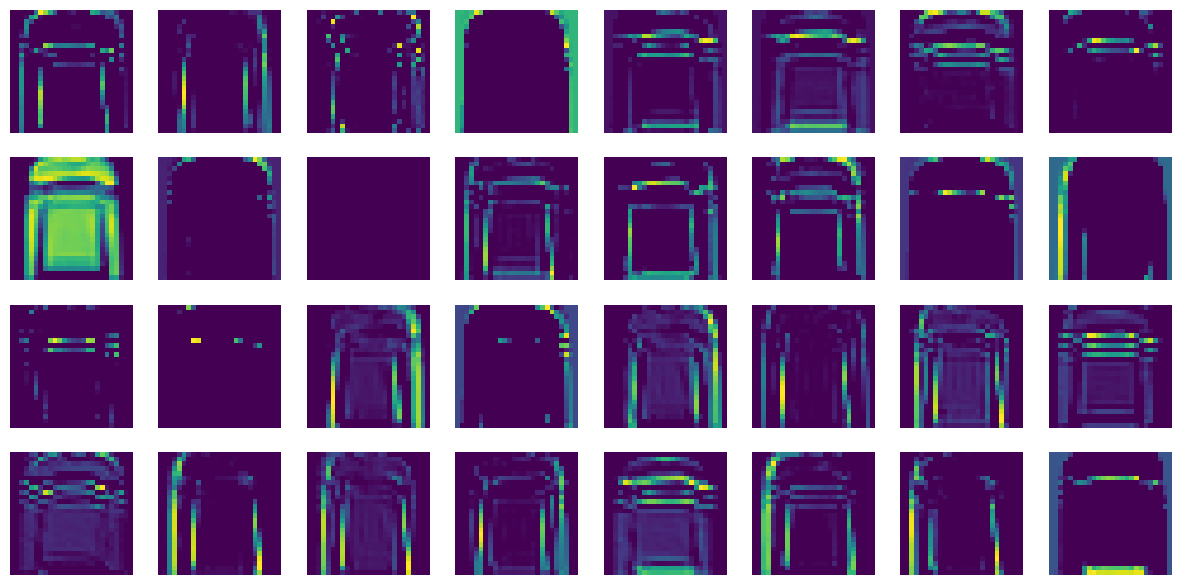

Visualizing layer 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


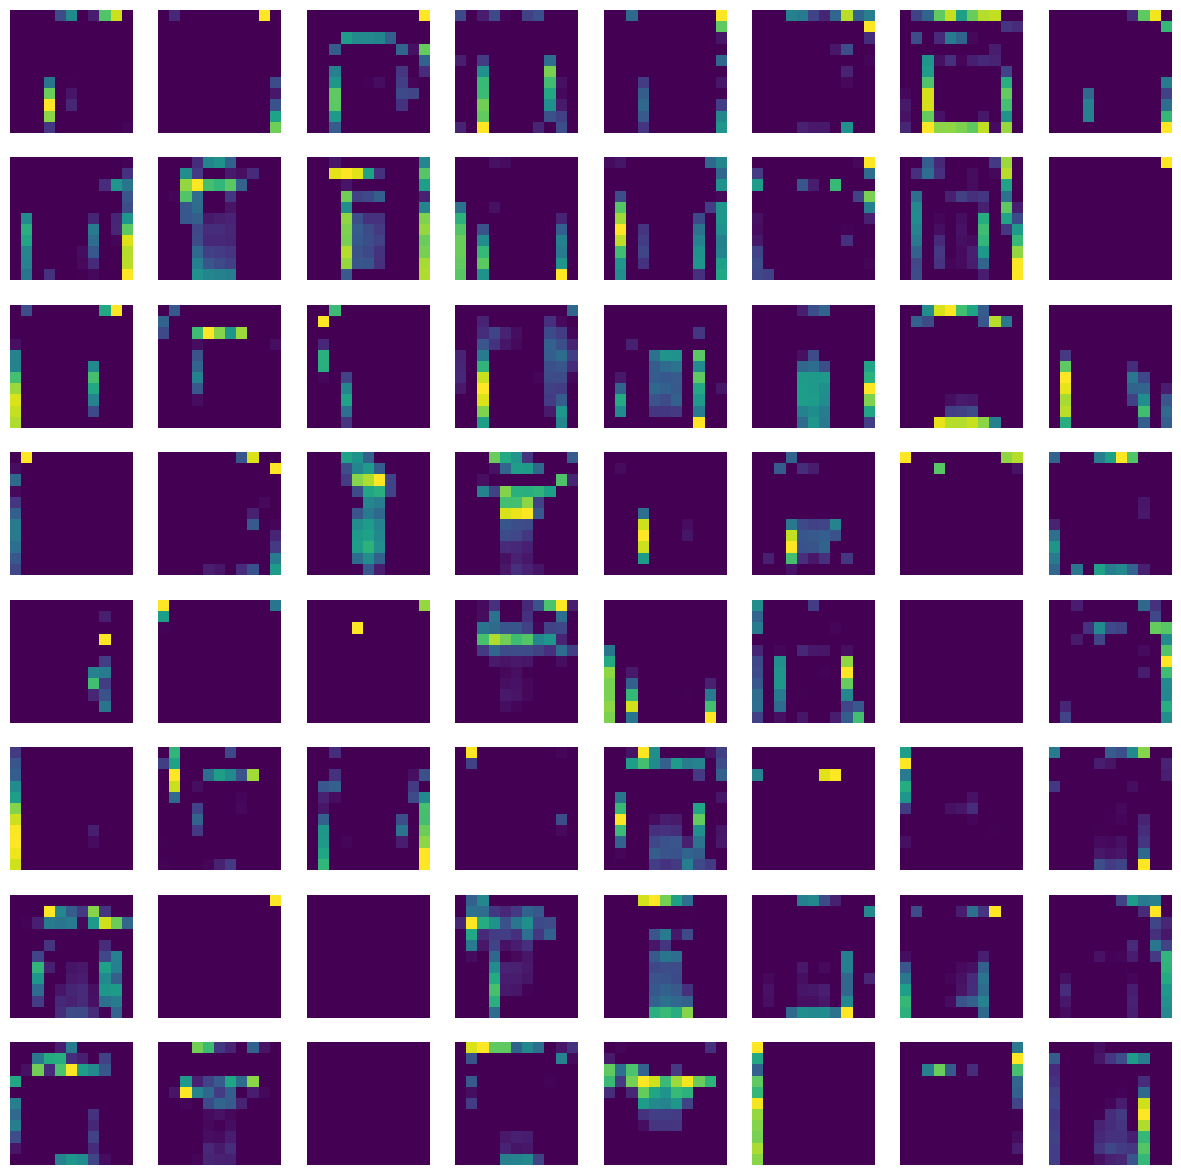

Visualizing layer 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


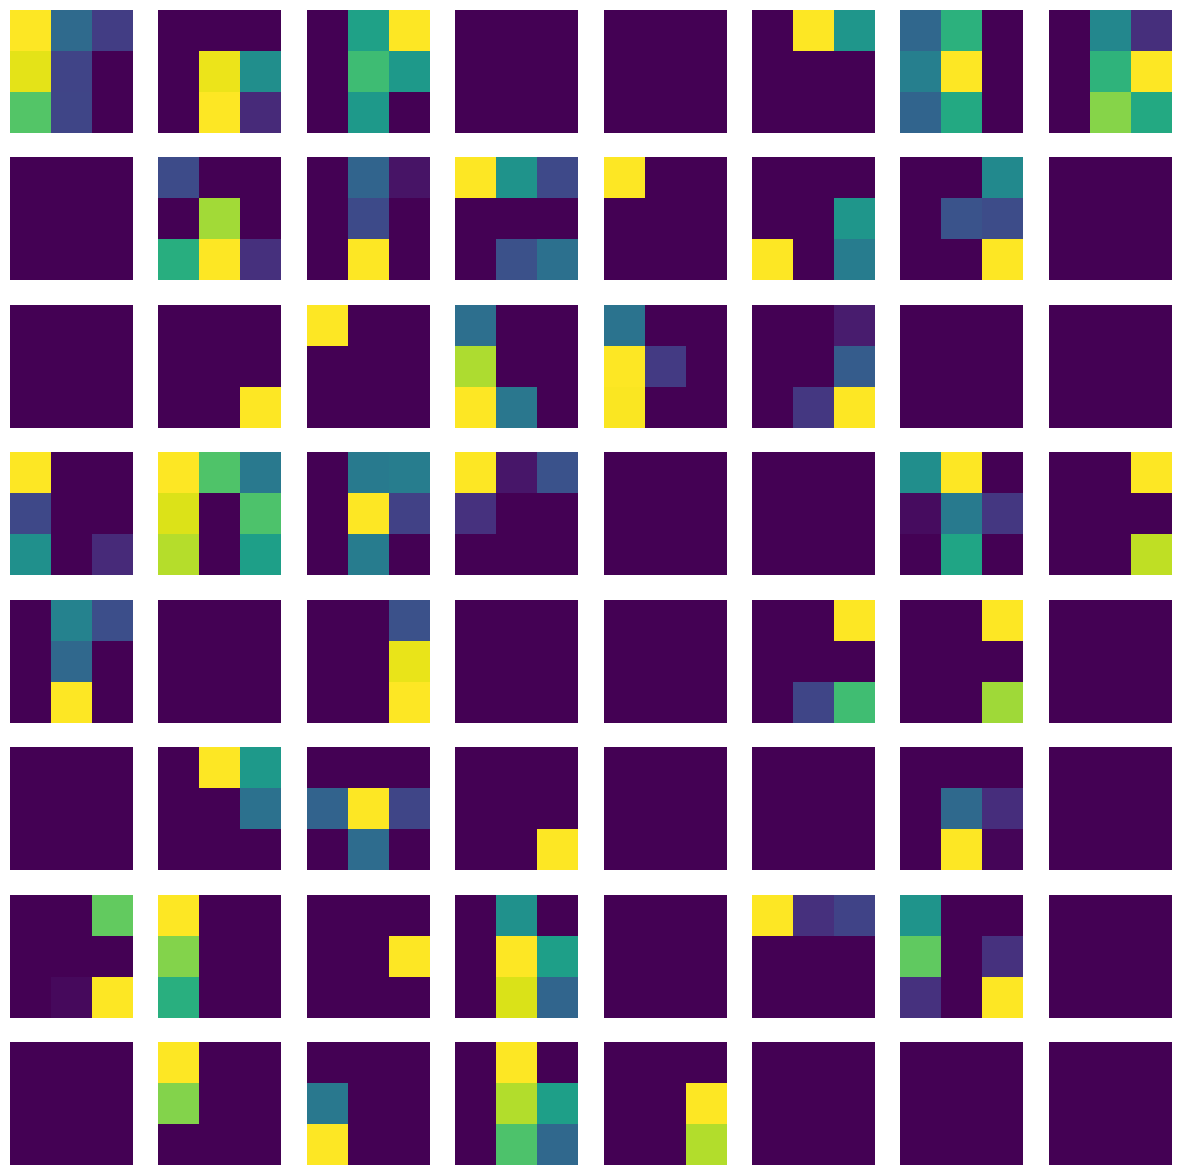

In [14]:
# Visualize feature maps
def visualize_feature_maps(layer_index, image_index):
    activations = activation_model.predict(train_images[image_index].reshape(1, 28, 28, 1)) # Reshape to (1, 28, 28, 1) for MNIST
    activation = activations[layer_index]
    feature_map_count = activation.shape[-1]
    plt.figure(figsize=(15, 15))
    for i in range(feature_map_count):
        plt.subplot(8, 8, i+1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Example: Visualize feature maps for the first convolutional layer of the first image
for layer in range(len(layer_outputs)):
    print(f"Visualizing layer {layer + 1}")
    visualize_feature_maps(layer, 5) # You can still use image index 5